$\qquad$ $\qquad$$\qquad$  **TDA 231 Machine Learning: Homework 5** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: Clustering**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Aristide** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 21/5** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Name, Personal no., email** <br />

General guidelines:
* Since there is no theoretical part for this assigment, submit this ipynb only (with completed code/results).
* All discussion regarding practical problems, along with solutions and plots should be specified here itself. We will not generate the solutions/plots again by running your code.
* Your name, personal number and email address should be specified above.
* All datasets can be downloaded from the course website.
* All plots/tables and other relevant information should be included.

# Practical problems

The follwing code might be useful for this excercise.

```python
import scipy.io
mat = scipy.io.loadmat('hw5_p1a.mat')
print (mat.keys())
X = mat['X']
```

## [K-Means Implementation, 20 points]

a. Implement the basic (linear) $k$-means algorithm as described in the lecture, using the euclidean distance. Use (uniformly) random points from the data as initialization for the centroids. Terminate the iterative procedure when the the cluster assignments do not change.

b. Run your implementation on the matrix $X$ in **hw5_p1a.mat** with $k=2$. Each row of the matrix is an observation, and each column is a feature. Store the cluster assignment both after 2 iterations, and at convergence. Produce a scatter plot of the data with colors indicating the cluster assignments at convergence and highlight points that have changed assignment after the second iteration.

c. Implement the kernel $k$-means algorithm as described in the lecture, using the Gaussian RBF-kernel.

d. Run the linear $k$-means **and** your kernel $k$-means on **hw5_p1b.mat** with $k=2$. For the Gaussian RBF-kernel, use $\sigma=0.2$. Produce scatter plots of the data, with color indicating the cluster assignment at convergence, one plot for each of the algorithms.

Finished the kmeans algorithm in 11 iterations.


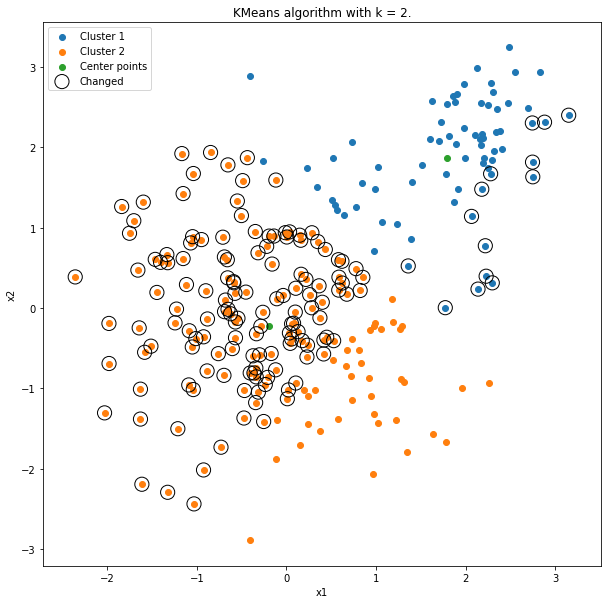

In [15]:
# Task a and b
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import math
import random


# Takes two points and returns the distance between them as a float
def euclidian_distance(point_origin, point_target):
    delta_distance = [point_origin[0] - point_target[0], point_origin[1] - point_target[1]]
    return math.sqrt(delta_distance[0]**2 + delta_distance[1]**2)

# Finds the closest mu value to the given point
def find_closest_class(mu, point):
    tmp = 0
    for i in range(1, len(mu)):
        if(euclidian_distance(mu[i], point) < euclidian_distance(mu[tmp], point)):
            tmp = i
    return tmp

# Classifies the data into k clusters
def kmeans(k, data , difference_two_iterations = True):

    # z[n, k]= 0 means that x[n] does not belong to class k. z[n,k]= 1 means that it does belong to class k
    
    
    prevmu = np.ones((k, 2)) *10  # An arbitrary value that can not be reached through the guessing
    
    # Guess mu  
    mu = np.zeros((k,2))
    for i in range(0, k):
        mu[i] = [random.uniform(min(data[:, 0]), max(data[:, 0])), random.uniform(min(data[:, 1]), max(data[:, 1]))]
        
        
    iterations = 0
    # As long as the clusters have not converged loop:
    while(not(np.array_equal(prevmu, mu))):
        iterations +=1
        
        z = np.zeros((len(data), k))
        # Loop through points and assign each point to its closest mean
        for i in range(0, len(data)):   
            class_ = find_closest_class(mu, data[i])
            # Set it in z
            z[i,class_] = 1
        # Save the z values for the second iteration
        if(iterations == 2):
            z_2 = np.copy(z)
        
        # Save the current mu, to compare for convergence
        prevmu = np.copy(mu)
        
        # Calculate the new mu
        for i in range(0,k):
            indices = [a for a, x in enumerate(z[:,i]) if x == 1]
            mu[i] = (np.mean(data[indices,0]),np.mean(data[indices,1]))
            
        # End of while loop (check convergence between prevmu and mu)
 

    plt.figure(figsize=(10,10))
    
    # Plot all clusters after convergence
    legend = []
    for i in range(0,k):
        indices = [a for a, x in enumerate(z[:,i]) if x == 1]
        plt.scatter(data[indices, 0], data[indices, 1])
        leg = ("Cluster %i" % (i+1))
        legend.append(leg)

    # Plot the mu points after convergence
    plt.scatter(mu[:, 0], mu[:, 1])
    legend.append("Center points")
    
    # Finding the changes between iteration 2 and convergence
    if(difference_two_iterations):
        # Get indexes for where there was a change
        indices = [a for a, x in enumerate(np.abs(z-z_2)) if sum(x) != 0]
        # Plot them with small black circles
        plt.scatter(data[indices, 0], data[indices, 1],s=200, facecolors='none', edgecolors='k')
        legend.append("Changed")
    
    # Making the plot pretty
    print("Finished the kmeans algorithm in %i iterations." % iterations)
    plt.title("KMeans algorithm with k = %i." % k)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend(legend)
    plt.show()
    
# Loading data
mat = scipy.io.loadmat('hw5_p1a.mat')
X = mat['X']
kmeans(2,X)


Finished the kmeans algorithm in 12 iterations.


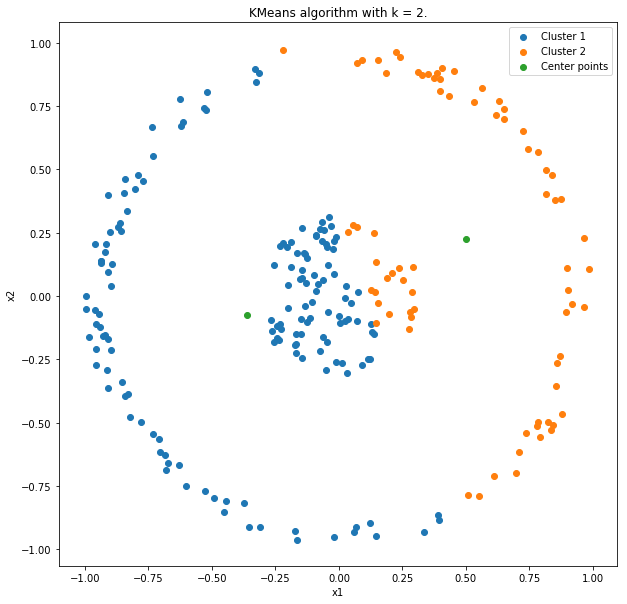

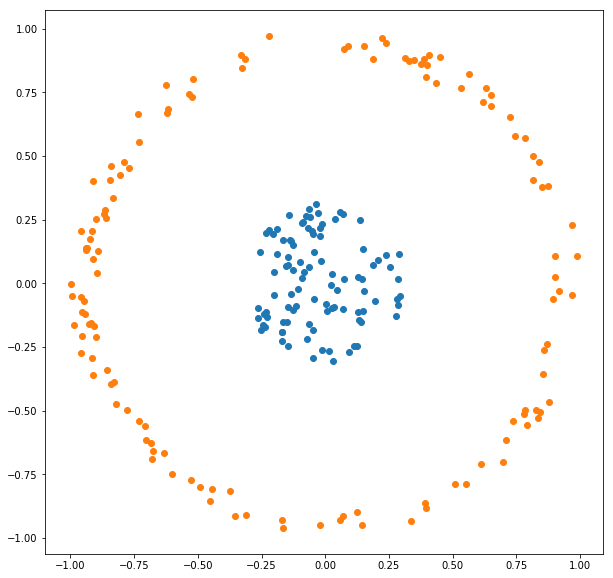

In [36]:
# Task c and d

# k function (RBF kernel)
def k_func(x, xp, sigma):
    return np.exp(- np.linalg.norm(x - xp) ** 2 / (2 * sigma ** 2))


def kmeans_kernel(given_k, data, sigma):
    # Gaussian RBF kernel
    
    #initialize random classes
    z = np.zeros((len(data), given_k))
    init_random_z = np.random.randint(given_k, size=len(data))
    for i in range(0, len(z)):
        z[i, init_random_z[i]] = 1
    not_converged = True
    while(not_converged):
        # Loop to K
        z_new = np.zeros((len(data), given_k))
        distances = np.zeros((len(data), given_k))
        for k in range(0, given_k):
            N_k = np.sum(z[:,k])
            
            # create the ml sum
            ml_sum = 0
            for m in range(0, len(data)):
                for l in range(0,len(data)):
                    ml_sum += z[m,k] * z[l,k] * k_func(data[m], data[l], sigma)
            third_val = ml_sum * (1 / (N_k * N_k))
            # Loop to N
            for n in range(0, len(data)):
                m_sum = 0
                for m in range(0, len(data)):
                    m_sum += z[m,k] * k_func(data[n],data[m], sigma)
                second_val = m_sum *(2 / (N_k))
                
                distances[n,k]= k_func(data[n],data[n], sigma) - second_val + third_val
        
        tmp = 100 # Arbitrary big number
        for index in range(0, len(data)):
            for k in range(0, given_k):
                if tmp > distances[index,k] :
                    tmp = distances[index,k]
                    sol_k = k
            z_new[index,sol_k] = 1
            
        not_converged = not (np.array_equal(z, z_new))
        z = z_new
        
    plt.figure(figsize=(10,10))
    legend = []
    for i in range(0,given_k):
        indices = [a for a, x in enumerate(z[:,i]) if x == 1]
        plt.scatter(data[indices, 0], data[indices, 1])
        leg = ("Cluster %i" % (i+1))
        legend.append(leg)
    plt.show()
    
                
# Loading the data
mat = scipy.io.loadmat('hw5_p1b.mat')
X = mat['X']
# Running the linear kernel from above (Omitting the circles for difference between iterations in task b)
kmeans(2, X, difference_two_iterations=False)

# Running the gaussian kernel
kmeans_kernel(2,X , 0.2)